# Multiple Linear Regression

## 1.Import the libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


## 2. Read the CSV file

In [45]:
df = pd.read_csv('multiple_linear_regression_dataset.csv')
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


## 3.Taking Independent and Dependent variables

In [48]:
X_original = df[['age', 'experience']].to_numpy()
y = df['income'].to_numpy()

ones_column = np.ones((X_original.shape[0], 1))
X = np.hstack((ones_column, X_original))
print("input matrix x: \n", X, "\n")
print("output variable y: \n", y)

input matrix x: 
 [[ 1. 25.  1.]
 [ 1. 30.  3.]
 [ 1. 47.  2.]
 [ 1. 32.  5.]
 [ 1. 43. 10.]
 [ 1. 51.  7.]
 [ 1. 28.  5.]
 [ 1. 33.  4.]
 [ 1. 37.  5.]
 [ 1. 39.  8.]
 [ 1. 29.  1.]
 [ 1. 47.  9.]
 [ 1. 54.  5.]
 [ 1. 51.  4.]
 [ 1. 44. 12.]
 [ 1. 41.  6.]
 [ 1. 58. 17.]
 [ 1. 23.  1.]
 [ 1. 44.  9.]
 [ 1. 37. 10.]] 

output variable y: 
 [30450 35670 31580 40130 47830 41630 41340 37650 40250 45150 27840 46110
 36720 34800 51300 38900 63600 30870 44190 48700]


## 4. Applying formula to find the coefficents and intercept values.

### 4.1 Formula : beta = (x.t * x)-1 * x.t * y

In [49]:

# To find coefficent w1 and w2.
x_transpose = X.T
# multiply x and x transpose
Xtx = np.dot(x_transpose, X)
# inverse of Xtx
Xtx_inv = np.linalg.inv(Xtx)
# multiply Xtx_inv with x transpose
Xtx_inv_xt = np.dot(Xtx_inv, x_transpose)
# to get coefficients multiply it with y
beta = np.dot(Xtx_inv_xt, y)
print("Beta array: ", beta)

Beta array:  [31261.6898541    -99.19535546  2162.40419192]


### 4.2 Seperating coefficients and intercept from beta

In [51]:
intercept = beta[0]
coefficients = beta[1:]
print("Intercept: ", intercept)
print("coefficients: ", coefficients)

Intercept:  31261.68985410121
coefficients:  [ -99.19535546 2162.40419192]


## 5. Model prediction function

In [52]:
def mult_lin_reg_predict(x1, x2):
    return coefficients[0]*x1 + coefficients[1]*x2 + intercept


## 6. Plotting the multiple regression model

<IPython.core.display.Javascript object>


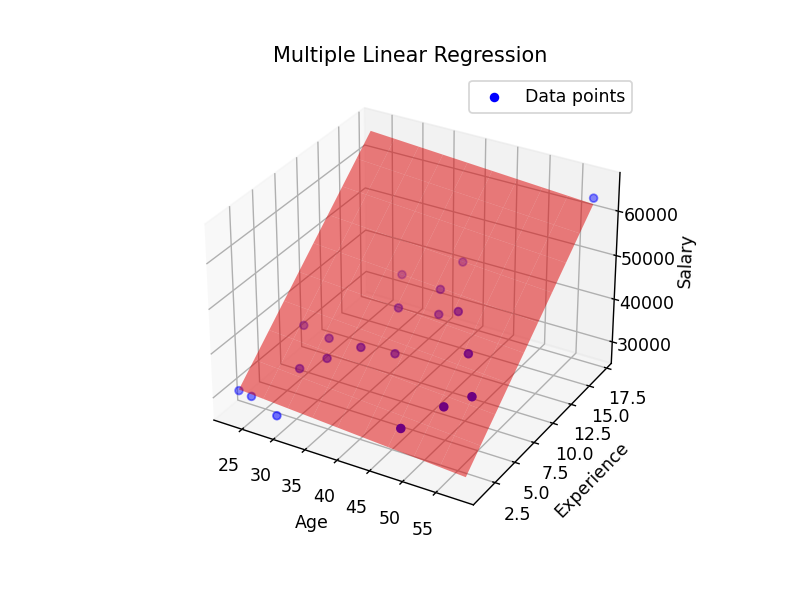

In [41]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the original data points
ax.scatter(X_original[:, 0], X_original[:, 1], y, color='blue', label='Data points')

# Generating a meshgrid for the prediction surface
age_range = np.linspace(X_original[:, 0].min(), X_original[:, 0].max(), 10)
experience_range = np.linspace(X_original[:, 1].min(), X_original[:, 1].max(), 10)
age_grid, experience_grid = np.meshgrid(age_range, experience_range)
Z = beta[0] + beta[1] * age_grid + beta[2] * experience_grid

# Plotting the prediction surface
ax.plot_surface(age_grid, experience_grid, Z, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Salary')
ax.set_title('Multiple Linear Regression')

# Show the plot
plt.legend()
plt.show()

## 7. Prediction of user input 

In [43]:
input_age = int(input("Enter your age: "))
input_exp = int(input("Enter your experience in years: "))

input_pred = mult_lin_reg_predict(input_age, input_exp)
print("Your predicted salary = ", round(input_pred))

Enter your age: 24
Enter your experience in years: 5
Your predicted salary =  39693


# Logistic Regression

## 1. Importing libraries

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Reading CSV file

In [54]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [59]:
df_mod = df.dropna()
df_mod

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
